In [5]:
import numpy as np
from sklearn import preprocessing

In [6]:
input_data = np.array([[5.1, -2.9, 3.3],
                       [-1.2, 7.8, -6.1],
                       [3.9, 0.4, 2.1],
                       [7.3, -9.9, -4.5]])


In [7]:
# Binarize data 
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [8]:
# Print mean and standard deviation
print("\nBEFORE:")
print("Mean =", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))


BEFORE:
Mean = [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]


In [9]:
# Remove mean
data_scaled = preprocessing.scale(input_data)
print("\nAFTER:")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))


AFTER:
Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std deviation = [1. 1. 1.]


In [10]:
# Min max scaling
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nMin max scaled data:\n", data_scaled_minmax)


Min max scaled data:
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]


In [12]:
# Normalize data
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1)
print("\nL2 normalized data:\n", data_normalized_l2)


L1 normalized data:
 [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]

L2 normalized data:
 [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


In [14]:
#Кодирование меток
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']
encoder=preprocessing.LabelEncoder()
encoder.fit(input_labels)

LabelEncoder()

In [15]:
print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)


Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


In [16]:
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", list(encoded_values))


Labels = ['green', 'red', 'black']
Encoded values = [np.int64(1), np.int64(2), np.int64(0)]


In [17]:
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nEncoded values =", encoded_values)
print("Decoded labels =", list(decoded_list))


Encoded values = [3, 0, 4, 1]
Decoded labels = [np.str_('white'), np.str_('black'), np.str_('yellow'), np.str_('green')]


In [19]:
#Логистическая регрессия
from sklearn import linear_model 
import matplotlib.pyplot as plt
from Utils import visualize_classifier

In [20]:
# Define sample input data
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

In [24]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)
classifier.fit(X, y)

LogisticRegression(C=100, solver='liblinear')

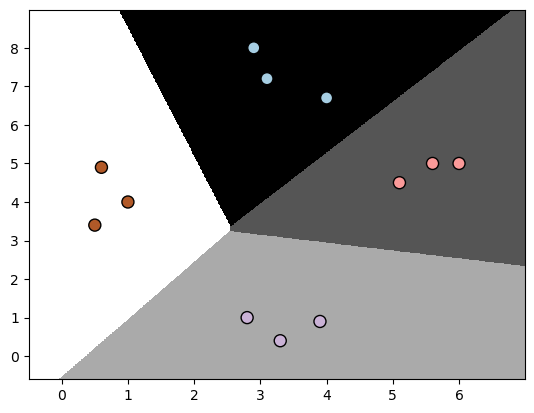

In [25]:
visualize_classifier(classifier, X, y)